In [2]:
import numpy as np
from scipy.optimize import minimize


In [3]:
# Load data
xm = np.array([
    18.3447,79.86538,85.09788,10.5211,44.4556,
    69.567,8.960,86.197,66.857,16.875,
    52.2697,93.917,24.35,5.118,25.126,
    34.037,61.4445,42.704,39.531,29.988
])

ym = np.array([
    5.072,7.1588,7.263,4.255,6.282,
    6.9118,4.044,7.2595,6.898,4.8744,
    6.5179,7.3434,5.4316,3.38,5.464,
    5.90,6.80,6.193,6.070,5.737
])

In [4]:
# Calculate y
def calc_y(x):
    a,b,c = x
    y = a+b/xm + c*np.log(xm)
    
    return y


In [5]:
# Define objecive
def objective(x):
    return np.sum(((calc_y(x) - ym)/ym)**2)
    

In [6]:
# Initial guesses
x0 = np.zeros(3)

In [7]:
# Show initial objective
print(f'Initial SSE Objective: {objective(x0)}')

Initial SSE Objective: 20.0


In [8]:
# Optimize
# Bounds on variables
bnds100 = (-100, 100)
no_bnds = (-1.0e10, 1.0e10)
bnds = (no_bnds, no_bnds, bnds100)
solution = minimize(objective, x0, method='SLSQP', bounds=bnds)

X = solution.x
y = calc_y(X)

In [9]:
# Show final objective
print(f'Final SSE Objective: {objective(X)}')

Final SSE Objective: 0.0003651726174522593


In [10]:
# Print solution
print('Solution')
print(f'a = {X[0]}')
print(f'b = {X[1]}')
print(f'c = {X[2]}')


Solution
a = 0.5514581077186436
b = 1.9269703429736875
c = 1.499428856802254


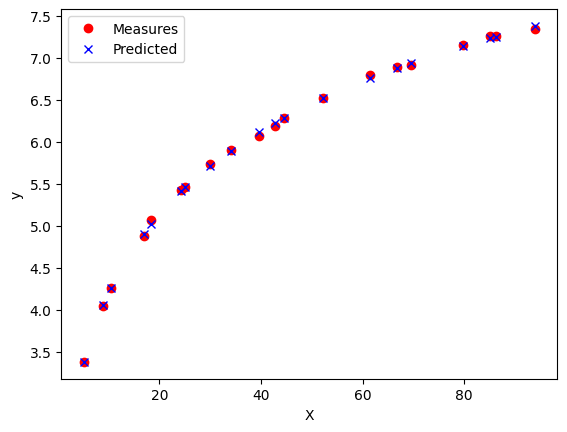

In [11]:
# Plot solution
# Importing necessary libraties
import matplotlib.pyplot as plt

plt.figure(1)
plt.plot(xm,ym,'ro')
plt.plot(xm,y,'bx')
plt.xlabel('X')
plt.ylabel('y')
plt.legend(['Measures', 'Predicted'], loc='best')
plt.savefig('results_SciPy.png')
plt.show()